In [33]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load prepared data
df = pd.read_csv('../data/df_prepped.csv')
df.head()

,Year,Countries,Sand_1,Sand_2,Sand_3,Sand_4,Sand_5,Sand_6,Sand_7,Clay_1,...,maize_lag-2,pcp_mean_lag-2,tmax_mean_lag-2,tmin_mean_lag-2,spi_mean_lag-2,maize_lag-3,pcp_mean_lag-3,tmax_mean_lag-3,tmin_mean_lag-3,spi_mean_lag-3
0,2007,Angola,50,51,51,48,45,46,46,37,...,0.721607,129.051864,301.518536,292.496579,1.644698,0.620005,109.983325,301.786056,292.204097,0.514275
1,2007,Angola,62,64,63,59,58,59,59,27,...,0.300217,47.697564,303.988747,288.916992,0.909295,0.212699,41.130026,303.298082,288.642853,0.588172
2,2007,Angola,69,71,70,67,65,65,66,19,...,4.044452,42.130629,305.494178,290.535403,0.952237,2.295351,35.049776,304.824778,290.284886,0.371446
3,2007,Angola,60,63,61,57,53,53,53,29,...,0.907431,159.454723,299.404975,287.724299,1.374616,0.783018,174.088260,298.908208,287.362407,0.643207
4,2007,Angola,67,69,68,63,61,61,61,22,...,0.675967,66.698670,304.644632,290.635254,1.144088,0.605584,67.404588,303.930955,290.564185,0.553079


In [3]:
# Drop Countries and Farm
df_label = df.loc[:,['Countries','Farm']]
df = df.drop(['Countries','Farm'], axis=1)

In [4]:
# Separate a test set, the year 2016
df_test = df[df.Year == 2016].sort_values('Year')
df_train = df[df.Year != 2016]

print('The training set has years: ', list(df_train.Year.unique()))
print('The test set has years: ', list(df_test.Year.unique()))

The training set has years:  [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
The test set has years:  [2016]


In [5]:
SEED=1

In [6]:
# Shuffle
train = df_train.sample(frac=1, random_state=SEED)
test = df_test.sample(frac=1, random_state=SEED)

# X and y
X_train = train.drop(columns=['Y_maize_major','Year'], axis=1)
y_train = train['Y_maize_major']
X_test = test.drop(columns=['Y_maize_major','Year'], axis=1)
y_test = test['Y_maize_major']

In [7]:
# TPOT best model pipeline
exported_pipeline = make_pipeline(
    PCA(iterated_power=7, svd_solver="randomized"),
    ElasticNetCV(l1_ratio=0.75, tol=0.01)
)

In [20]:
exported_pipeline

Pipeline(steps=[('pca', PCA(iterated_power=7, svd_solver='randomized')),
                ('elasticnetcv', ElasticNetCV(l1_ratio=0.75, tol=0.01))])

In [11]:
y_preds = exported_pipeline.predict(X_test)

In [13]:
# Calculate and print metrics
rmse = mean_squared_error(y_test, y_preds, squared=False)
mae = mean_absolute_error(y_test, y_preds)
print('Performance on test set (year 2016)')
print('RMSE:',round(rmse,4))
print('MAE:',round(mae,4))

Performance on test set (year 2016) (baseline results)
RMSE: 0.2804
MAE: 0.1848


In [15]:
exported_pipeline.steps

[('pca', PCA(iterated_power=7, svd_solver='randomized')),
 ('elasticnetcv', ElasticNetCV(l1_ratio=0.75, tol=0.01))]

In [23]:
pd.DataFrame(exported_pipeline.steps[0][1].components_.T, index=X_train.columns)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
Sand_1,-0.039378,0.328345,0.005995,-0.003150,0.000555,-0.246167,-0.056828,-0.185892,0.025061,0.044276,...,-0.000246,0.000388,0.000195,0.000157,-1.096577e-04,2.068322e-04,-0.000472,4.815169e-04,1.296078e-05,-0.000054
Sand_2,-0.038217,0.338452,0.005607,-0.003554,0.001706,-0.280647,-0.071102,-0.220527,0.046499,0.039620,...,0.000780,0.000920,-0.000526,-0.000263,1.116145e-05,-6.157018e-05,-0.000035,-7.959939e-04,-3.863082e-04,0.000133
Sand_3,-0.037754,0.338165,0.007020,-0.003716,0.000012,-0.260449,-0.056524,-0.189237,0.023032,0.031340,...,0.000804,0.000308,0.000367,-0.000029,-6.534093e-08,-3.587738e-04,0.000764,2.346622e-04,7.176068e-04,-0.000061
Sand_4,-0.035097,0.326161,-0.001265,0.001419,0.002839,-0.155689,-0.057920,0.080916,0.027359,0.054613,...,0.000175,-0.000626,0.000134,-0.000551,-1.636708e-04,2.629568e-05,0.000450,3.032088e-04,-8.213900e-05,-0.000118
Sand_5,-0.036349,0.315231,0.002518,0.002047,-0.001744,-0.083424,-0.020931,0.282535,-0.043687,0.076916,...,-0.000352,-0.002052,-0.000451,0.000295,-2.938983e-05,-2.270023e-04,-0.000283,-4.842770e-05,-9.850557e-05,0.000266
Sand_6,-0.036502,0.310790,0.001262,0.003128,-0.001161,-0.066661,-0.019753,0.327570,-0.044595,0.093224,...,0.001129,0.001610,0.000462,0.000264,3.721742e-04,-1.147015e-04,-0.000422,1.196729e-04,-1.587258e-04,-0.000023
Sand_7,-0.037285,0.300971,-0.002740,0.004963,0.000660,-0.043701,-0.021208,0.351403,-0.035609,0.113475,...,-0.000820,-0.000362,-0.000150,0.000015,-1.676637e-04,6.511732e-04,-0.000001,-1.584540e-04,1.378158e-04,-0.000130
Clay_1,0.027545,-0.189029,0.008850,-0.006861,-0.006486,-0.223827,-0.055901,0.359584,-0.042083,0.068351,...,0.001594,-0.001251,-0.000335,-0.000313,2.125203e-04,9.358018e-05,0.000370,8.119079e-05,2.080726e-04,0.000283
Clay_2,0.026042,-0.197215,0.008194,-0.006269,-0.006819,-0.193549,-0.048026,0.392863,-0.054763,0.062029,...,0.001918,0.002168,-0.000244,-0.000523,-2.639258e-04,-4.255353e-04,-0.000296,-4.857290e-04,8.603172e-05,-0.000035
Clay_3,0.026312,-0.200783,0.005514,-0.005583,-0.004004,-0.210337,-0.063621,0.346353,-0.023439,0.081113,...,0.000213,0.000622,0.000547,0.000942,1.970875e-06,-2.336470e-04,0.000331,1.452370e-04,1.799630e-04,-0.000107


In [26]:
n_pcs= exported_pipeline.steps[0][1].components_.shape[0]
most_important = [np.abs(exported_pipeline.steps[0][1].components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [X_train.columns[most_important[i]] for i in range(n_pcs)]

In [27]:
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(sorted(dic.items()))

In [28]:
df

,0,1
0,PC1,pcp_mean_lag-2
1,PC10,Harvest_Maize_month_int
2,PC11,maize_lag-1
3,PC12,Sow_Maize_month_int
4,PC13,tmax_mean_lag-1
5,PC14,sow_to_harvest_months
6,PC15,Sand_4
7,PC16,Sand_7
8,PC17,spi_mean_lag-1
9,PC18,Clay_1


In [18]:
# Model coefficients
coeffs = exported_pipeline.steps[1][1].coef_

17 features, reduction of 63.04%


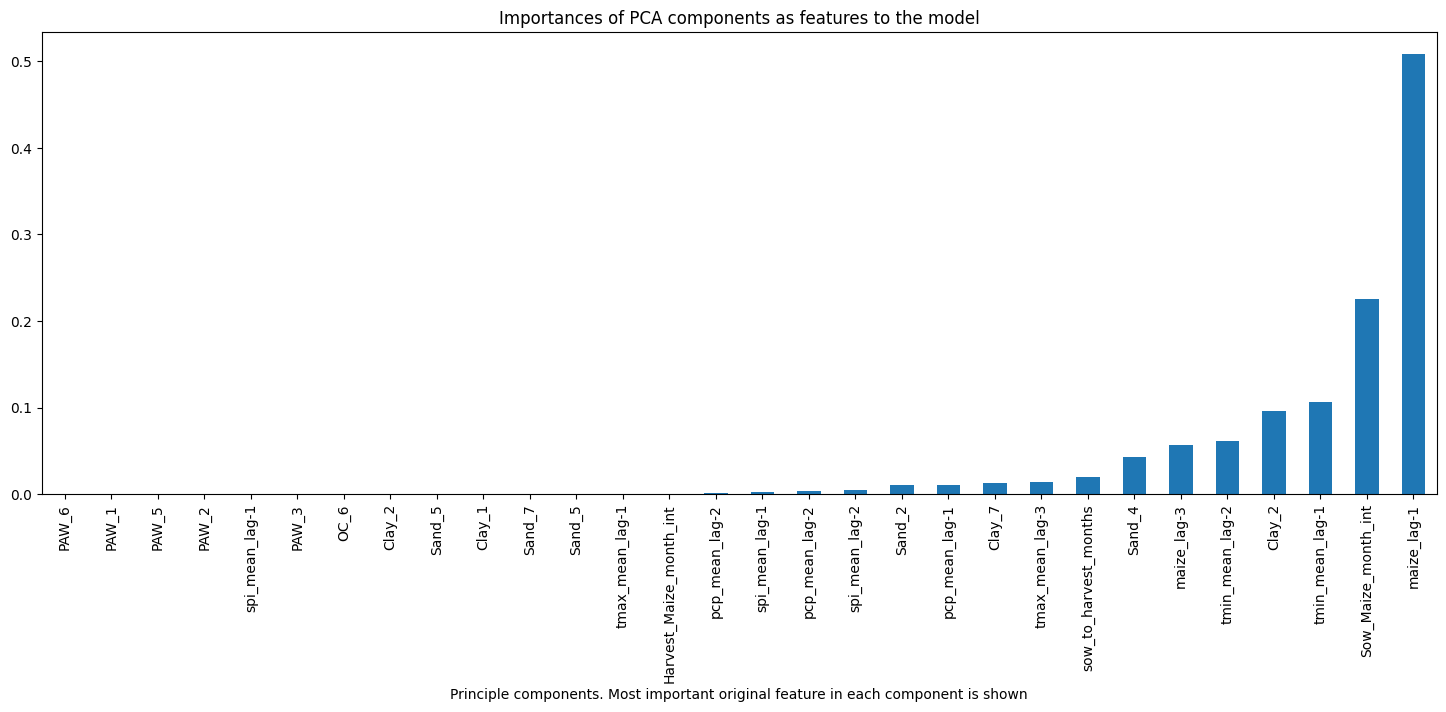

In [35]:
component_importances = pd.Series(index = dic.values(), data = np.abs(coeffs))

n_selected_features = (component_importances>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(component_importances))*100))

component_importances.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))
plt.xlabel('Principle components. Most important original feature in each component is shown')
plt.title('Importances of PCA components as features to the model')
plt.show()

However, as each component has information from more than one original feature, interpretation is not as simple. Therefore, we use simpler models for explainability (see interpretation.ipynb)